## Training with Pre-trained models
Authors:
- Mario Izquierdo
- Martín Romero

In this notebook we are going to experiment with pre-trained models to solve the proposed image classification problem. Specifically in this notebook we are going to experiment with the VGG16 pretrained network. The way the model will be trained will be using feature extraction, that consists on using the representations learned by a previously trained model (VGG16 in this case) to extract interesting features from new samples. 

In [1]:
import keras
from keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import csv
import tensorflow as tf
import matplotlib.pyplot as plt

2024-03-04 15:52:13.795893: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 15:52:13.906771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 15:52:13.906806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 15:52:13.923280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 15:52:13.957045: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.set_visible_devices([], 'GPU')

2024-03-04 15:52:16.711606: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 15:52:16.769478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 15:52:16.769628: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Using VGG16 model

We define the function that preprocesses the images and extracts their features, which will be used to train our model.

In [3]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
#Function to plot the results
def plot(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "b-o", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "r-o", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "b-o", label="Training loss")
    plt.plot(epochs, val_loss, "r-o", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()


### Load dataset

We load the images from our dataset to create the train, validation and test sets. In this case we have used an image size of (180,180) due to the limited computational capacity of our computer.

In [4]:
img_size = 180
image_size = (img_size, img_size)
img_tensor_shape = (img_size, img_size, 3)
batch_size = 32
train_dataset = image_dataset_from_directory(
    '../data/new_data/train',
    image_size = image_size,
    batch_size = batch_size)
test_dataset = image_dataset_from_directory(
    '../data/new_data/test',
    image_size = image_size,
    batch_size=batch_size)
val_dataset = image_dataset_from_directory(
    '../data/new_data/validation',
    image_size = image_size,
    batch_size=batch_size)

Found 10778 files belonging to 5 classes.
Found 1497 files belonging to 5 classes.
Found 2696 files belonging to 5 classes.


### Generating features of VGG16
We generate the features of the pre-trained model to then train our model.

In [5]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(val_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

2024-03-04 15:52:17.693634: I external/local_xla/xla/service/service.cc:168] XLA service 0x564b8028eb80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-03-04 15:52:17.693669: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-03-04 15:52:17.705205: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709563937.856970    4848 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-04 15:52:17.857909: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

### Training the model
We create our model and train it with the features extracted previously. We added to the pretrained model, a final layer with Dropout, to adapt the network to our problem.

In [6]:
inputs = keras.Input(shape=train_features.shape[1:])
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/feature_extraction_vgg16.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=5,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8821 - loss: 14.8889 - val_accuracy: 0.9570 - val_loss: 4.5725
Epoch 2/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9713 - loss: 2.6081 - val_accuracy: 0.9533 - val_loss: 5.6846
Epoch 3/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9803 - loss: 1.7127 - val_accuracy: 0.9507 - val_loss: 6.3260
Epoch 4/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9849 - loss: 1.2105 - val_accuracy: 0.9536 - val_loss: 6.9796
Epoch 5/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9854 - loss: 1.0003 - val_accuracy: 0.9581 - val_loss: 5.9865


In [7]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('Accuracy: ', test_acc)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 5.1511
Accuracy:  0.9679358601570129


## Plotting results
We plot the evolution of the accuracy (in training and validation) and the evolution of the loss (in training and validation)

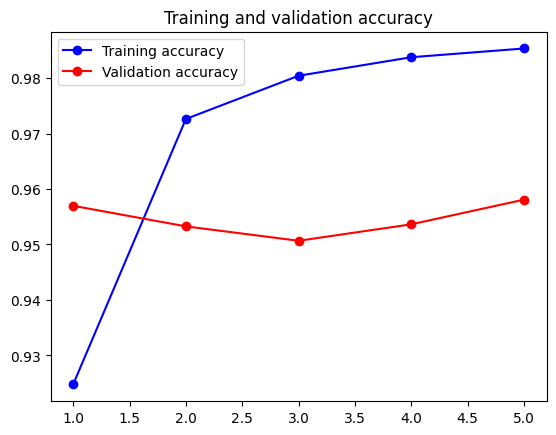

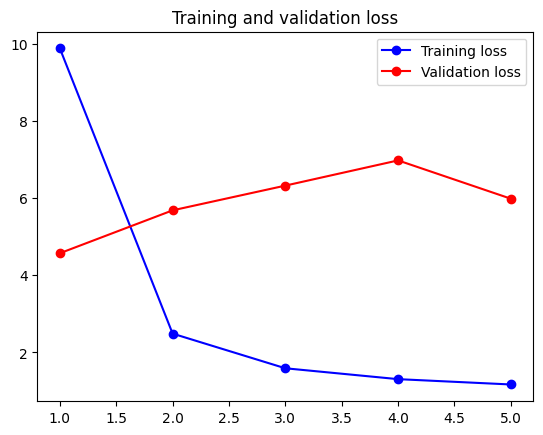

In [8]:
plot(history)

With few training epochs we have achieved a very good result, this is thanks to the use of the pre-trained model, that when we pass it the input images it returns us the processed images with all that it has already learned previously, doing so we can obtain very good results with very little training time.

### Saving the results in a .csv

In [9]:
val_loss, val_acc = model.evaluate(val_features, val_labels)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 5.9517


In [10]:
import os

def save_model_results(file_path, model_name, accuracy):
    """
    This function saves the model's accuracy to a CSV file. It checks if the file exists
    to add a header if necessary and then opens the file in append mode to add
    the model name and accuracy.
    """
    # Check if the file exists to decide on adding the header
    header_needed = not os.path.isfile(file_path)
    # Open the file in append mode, which creates the file if it doesn't exist
    with open(file_path, "a") as file:
        # Add a header if the file was just created
        if header_needed:
            file.write("model_name,accuracy\n")
        # Append the model name and accuracy to the file
        file.write(f"{model_name},{accuracy:.3f}\n")
    

In [11]:
save_model_results('val_results.csv', 'preTrained_VGG16', val_acc)
save_model_results('test_results.csv', 'preTrained_VGG16', test_acc)